# implement linear least square method and nonlinear least square method

1. 只完成多项式拟合
2. 使用sympy参考<https://blog.csdn.net/cj151525/article/details/95756847>

## 1. 线性最小二乘法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# 生成的是二维平面数据。
UpperLimit = 20
LowerLimit = -20
SamplesNumber = 5

samples = [[random.randint(LowerLimit, UpperLimit) for j in range(1, 3)] for i in range(0, SamplesNumber)]
samples_pd = pd.DataFrame(samples, columns=['x', 'y'])
samples_pd

,x,y
0,9,18
1,18,17
2,20,17
3,14,4
4,3,0


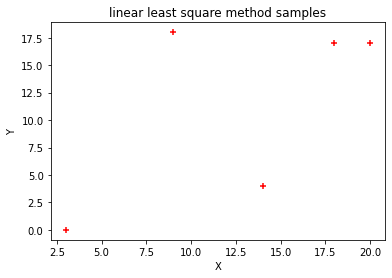

In [3]:
# display data
plt.title("linear least square method samples")
plt.xlabel('X')
plt.ylabel('Y')

for index, row in samples_pd.iterrows():
    plt.scatter(row['x'], row['y'], marker='+', color='red')
# plt.savefig("../../pictures/LinearLeastSquareMethodSamples.jpg")
plt.grid()
plt.show()

In [4]:
# 添加一列为y_hat
samples_pd['y_hat'] = None
samples_pd['loss'] = None
samples_pd

,x,y,y_hat,loss
0,9,18,None,None
1,18,17,None,None
2,20,17,None,None
3,14,4,None,None
4,3,0,None,None


In [5]:
import sympy
a = sympy.Symbol('a')
b = sympy.Symbol('b')
x = sympy.Symbol('x')
y_hat = sympy.Symbol('yh')
y = a*x + b
loss = (y - y_hat)**2
# y_=sympy.diff(y,x)
print(y)
print(loss)

a*x + b
(a*x + b - yh)**2


In [6]:
# 定义变量
# x=sympy.Symbol('x')
fx= a*x + b
#使用evalf函数传值
y1=fx.evalf(subs={x:0, a:2})
print(y1)

a*x + b


In [7]:

def getLoss(sample):
    loss = (a * sample['x'] + b - sample['y'])**2
    return loss

samples_pd['loss'] = samples_pd.apply(getLoss, axis=1)
samples_pd

,x,y,y_hat,loss
0,9,18,None,(9*a + b - 18)**2
1,18,17,None,(18*a + b - 17)**2
2,20,17,None,(20*a + b - 17)**2
3,14,4,None,(14*a + b - 4)**2
4,3,0,None,(3*a + b)**2


In [10]:
loss_sum = samples_pd['loss'].sum() 
loss_sum

(3*a + b)**2 + (9*a + b - 18)**2 + (14*a + b - 4)**2 + (18*a + b - 17)**2 + (20*a + b - 17)**2

In [12]:
e_a = sympy.diff(loss_sum, a)
e_b = sympy.diff(loss_sum, b)
print(e_a)
print(e_b)

2020*a + 128*b - 1728
128*a + 10*b - 112


In [14]:

output = sympy.solve([e_a, e_b], [a, b])
print(output)

{a: 368/477, b: 632/477}


In [16]:
print(type(output))

<class 'dict'>


In [24]:
xxx = float(output[a])
print(xxx)

0.7714884696016772


<Figure size 576x360 with 0 Axes>

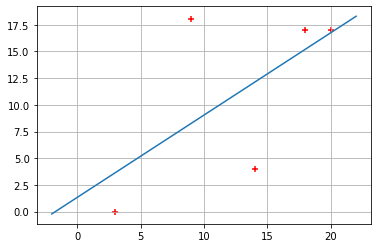

In [33]:

plt.figure(num=3, figsize=(8, 5))   # figsize的设置长和宽
# 从-3到中取50个数
x = np.linspace(LowerLimit - 2, UpperLimit + 2, 20)
# print(x)
y1 = float(output[a])*x+float(output[b])
y2 = x**2
plt.figure()
plt.plot(x, y1)
for index, row in samples_pd.iterrows():
    plt.scatter(row['x'], row['y'], marker='+', color='red')

plt.grid()
plt.savefig("../../pictures/LinearLeastSquareMethodResult.jpg")
plt.show()

## 2. 非线性最小二乘法